In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [138]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.26.4
Pandas Version 2.2.1
Seaborn Version 0.13.0
Matplotlib Version 3.8.0


In [139]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

# Read the Data

In [141]:
import os
listings= pd.read_csv('listings_summary.csv')
listings.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,NaN,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,43411,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,43411,25,41498.0,43328.0,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,NaN,t,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private ro

This project involves analyzing a dataset of property listings, from Berlin, to understand various aspects of host and listing behaviors. The dataset contains detailed information such as host response times, cancellation policies, review scores, and other attributes related to the listings and hosts. Through exploratory data analysis (EDA), the project aims to uncover insights into trends, patterns, and correlations, such as how host response rates impact reviews or how cancellation policies vary across locations. The analysis includes data cleaning, visualization, and statistical exploration to draw actionable conclusions.

In [142]:
pd.options.display.max_columns = None

In [143]:
listings.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,NaN,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,43411,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,43411,25,41498.0,43328.0,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,NaN,t,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private ro

In [144]:
## Checking the shape of the data: Number of columns and rows

listings.shape

(22552, 76)

In [145]:
## As the data set pertains to Berlin, some of the features have values for Berlin/Germany and hence such features will not show any
## variance from modeling perspective and hence the same should be dropped.. As an example let's look at the values in smart_location feature.
listings["smart_location"].value_counts()


smart_location
Berlin, Germany                                22419
., Germany                                        12
Berlin , Germany                                  12
Schöneberg, Germany                               11
Mitte, Germany                                     8
                                               ...  
Baseler Straße 91 A, 12205 Berlin , Germany        1
Wannsee, Germany                                   1
Berlin, Schöneberg, Germany                        1
Berlin-Wedding, Germany                            1
柏林, Germany                                        1
Name: count, Length: 61, dtype: int64

In [146]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

In [147]:
### Examine missing values
listings_na = listings.isna().sum()
listings_na[listings_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

host_acceptance_rate           22552
jurisdiction_names             22552
square_feet                    22106
monthly_price                  19893
weekly_price                   18871
host_response_rate             12895
host_response_time             12894
security_deposit                9361
cleaning_fee                    7146
host_neighbourhood              5094
review_scores_value             4435
review_scores_checkin           4432
review_scores_location          4431
review_scores_communication     4418
review_scores_accuracy          4414
review_scores_cleanliness       4411
review_scores_rating            4389
reviews_per_month               3914
first_review                    3914
last_review                     3908
neighbourhood                   1131
zipcode                          656
host_location                    116
state                             84
market                            63
beds                              40
bathrooms                         32
h

jurisdiction_names             22552
host_acceptance_rate           22552
square_feet                    22106
monthly_price                  19893
weekly_price                   18871
host_response_rate             12895
host_response_time             12894
security_deposit                9361

All these features have high percentage of missing values and hence these features would be dropped from analysis. We are dropping them from our dataset to make sure that other valid observations do not get eliminated when we remove or impute the 'na' values.


In [148]:
listings.drop(['jurisdiction_names', 'host_acceptance_rate','square_feet','monthly_price','weekly_price' ,'host_response_rate','host_response_time' ,'security_deposit'],axis='columns', inplace=True)                           

In [149]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_is_superhost                 22526 non-null  object 
 9   host_neighbourhood                17458 non-null  object 
 10  host_listings_count               22526 non-null  float64
 11  host_total_listings_count         22526 non-null  float64
 12  host

In [150]:
### Let's examine the target column which is price

listings.describe(include="all")["price"]

count      22552
unique       295
top       $30.00
freq        1387
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: price, dtype: object

In [151]:
listings.price.unique()

array(['$60.00', '$17.00', '$90.00', '$26.00', '$42.00', '$180.00',
       '$70.00', '$120.00', '$45.00', '$49.00', '$129.00', '$98.00',
       '$160.00', '$65.00', '$197.00', '$130.00', '$100.00', '$44.00',
       '$62.00', '$55.00', '$40.00', '$25.00', '$52.00', '$39.00',
       '$80.00', '$50.00', '$43.00', '$36.00', '$119.00', '$56.00',
       '$48.00', '$88.00', '$200.00', '$37.00', '$102.00', '$29.00',
       '$84.00', '$69.00', '$185.00', '$155.00', '$66.00', '$53.00',
       '$92.00', '$75.00', '$114.00', '$506.00', '$82.00', '$68.00',
       '$125.00', '$89.00', '$59.00', '$96.00', '$31.00', '$81.00',
       '$161.00', '$30.00', '$23.00', '$35.00', '$76.00', '$46.00',
       '$296.00', '$244.00', '$20.00', '$170.00', '$64.00', '$375.00',
       '$32.00', '$86.00', '$79.00', '$38.00', '$74.00', '$195.00',
       '$150.00', '$165.00', '$51.00', '$110.00', '$95.00', '$28.00',
       '$85.00', '$58.00', '$63.00', '$175.00', '$19.00', '$91.00',
       '$93.00', '$72.00', '$33.00', 

As "price" is of type object rather than int/float. Looks like that there are some special characters which are making it as object. Therefore, we need to convert this column into numeric value.

In [152]:
listings["price"] = listings["price"].apply(lambda x: x.replace("$", "")) # Remove dollar sign
listings["price"] = listings["price"].apply(lambda x: x.replace(",", "")) # Remove thousand separator
listings["price"] = listings["price"].astype("float") # Cast the column into type float
listings.describe()["price"]

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

Check the difference between 75% and Max value - looks like there are outliers/extreme values in the price variable. However as we are not sure if these are real outliers, we will not treat them right now.


In [153]:
listings["price"].value_counts().sort_index()

price
0.0        8
1.0        1
8.0        4
9.0       22
10.0      26
          ..
5000.0     2
6000.0    20
8000.0     1
8600.0     1
9000.0     1
Name: count, Length: 295, dtype: int64

In [154]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 99.5)))

0.5% properties have a price lower than  13.00
  1% properties have a price lower than  15.00
  5% properties have a price lower than  20.00
 10% properties have a price lower than  24.00
 90% properties have a price lower than  100.00
 95% properties have a price lower than  140.00
 99% properties have a price lower than  270.00
99.5% properties have a price lower than  400.00


In [155]:
## We are interested in building a model to correctly predict the listing price which are greater than 0 and less
## than 270

listings = listings[(listings.price > 1 ) & (listings.price < 270 )] 

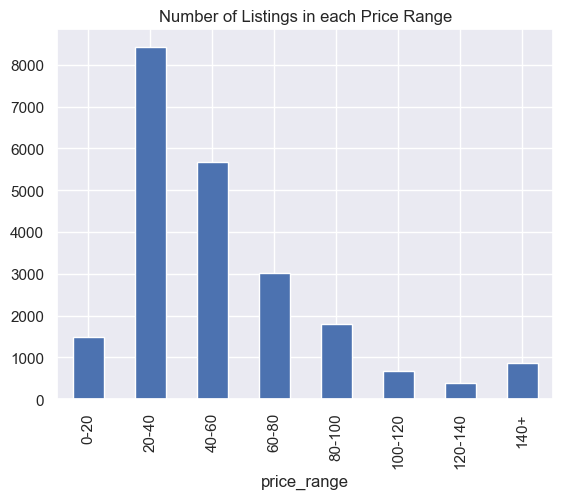

In [156]:
## Let's create a range variable to understand how many records we have in different slabs

price_range = pd.cut(listings["price"], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, listings["price"].max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
listings["price_range"] = price_range 
listings["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

We can also consider 'Price' as a Multiclass classifier and predict the probability of a class , instead of using price as a numeric variable. Sometimes the business is interested in predicting/estimating the price range and not an exact price.
However as we are working on regression model, this variable would be dropped



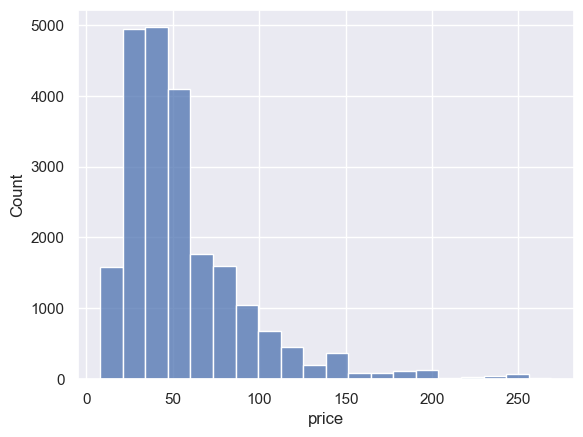

In [157]:
sns.histplot(listings['price'],bins=20);

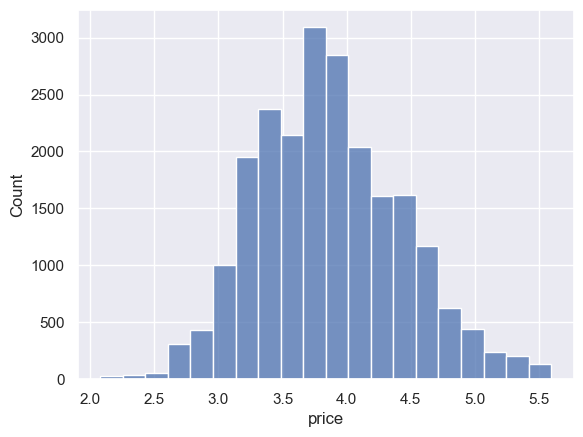

In [158]:
sns.histplot(np.log(listings["price"]),bins=20);

Log transformation of the price variable looks to be slightly more symmetrically distributed. We can use a log of the price variable as our target variable in the regression model, to check if performance is better than the price feature used without any transformation

In [159]:
## This is a custom column that we created to visualize the Price variable in discrete format.

listings.drop(['price_range'], axis='columns', inplace=True)

In [160]:
## Let's look at one more variable related to price- cleaning fee

# replace missing values with zero and convert cleaning_fee column into numeric value
listings.cleaning_fee.fillna('$0.00', inplace=True)
listings.cleaning_fee = listings.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
listings.cleaning_fee.isna().sum()

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\2713852695.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings.cleaning_fee.fillna('$0.00', inplace=True)


0

In [161]:
## is there are correlation between price and cleaning_fee
np.corrcoef(listings.cleaning_fee,listings.price)## Correlation is not high

array([[1.        , 0.40280616],
       [0.40280616, 1.        ]])

In [162]:
## Although the correlation is not too high, however if we know the Price, we can calculate the cleaning_fee
## Objective is to find out which all parameters are significant to define the price
## So we will drop cleaning_fee and use price as a dependent variable.
## Keeping cleaning_fee as an independent feature would mean that this might turn out to be most 
## significant variable in predicting the value of price.

In [163]:
### Is demand dependent on if a host is a superhost

# check super host column for NaN's
listings.host_is_superhost.isna().sum()

25

In [164]:
listings['host_is_superhost'].value_counts(1)

host_is_superhost
f    0.867384
t    0.132616
Name: proportion, dtype: float64

In [165]:
# replace NaN's with value 'false' for not being a superhost
listings.host_is_superhost.fillna(value='f', inplace=True)
listings.host_is_superhost.isna().sum()

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\271827206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings.host_is_superhost.fillna(value='f', inplace=True)


0

In [166]:
listings['host_is_superhost'].value_counts(1)

host_is_superhost
f    0.867533
t    0.132467
Name: proportion, dtype: float64

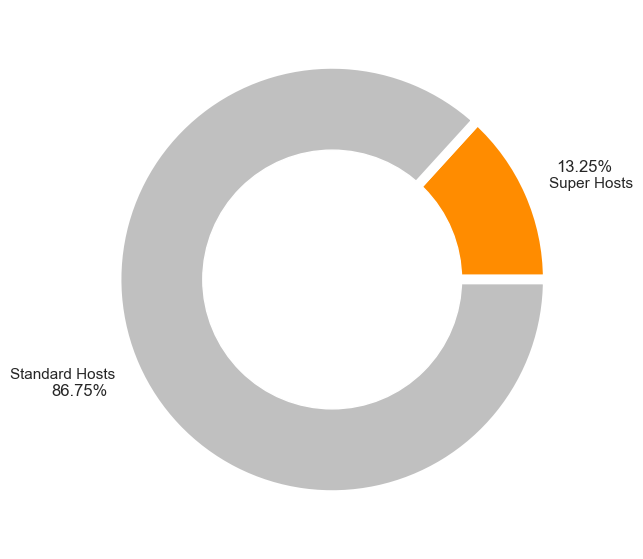

In [167]:
super_host    = listings.host_is_superhost.value_counts()['t']
no_super_host = listings.host_is_superhost.value_counts()['f']
names = ['Super Hosts','Standard Hosts']
size  = [super_host, no_super_host]
# create a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\1887739009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x="host_is_superhost", y="price", data=listings, palette="viridis")
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\91994\AppData\Local\Programs\Python\Python311\

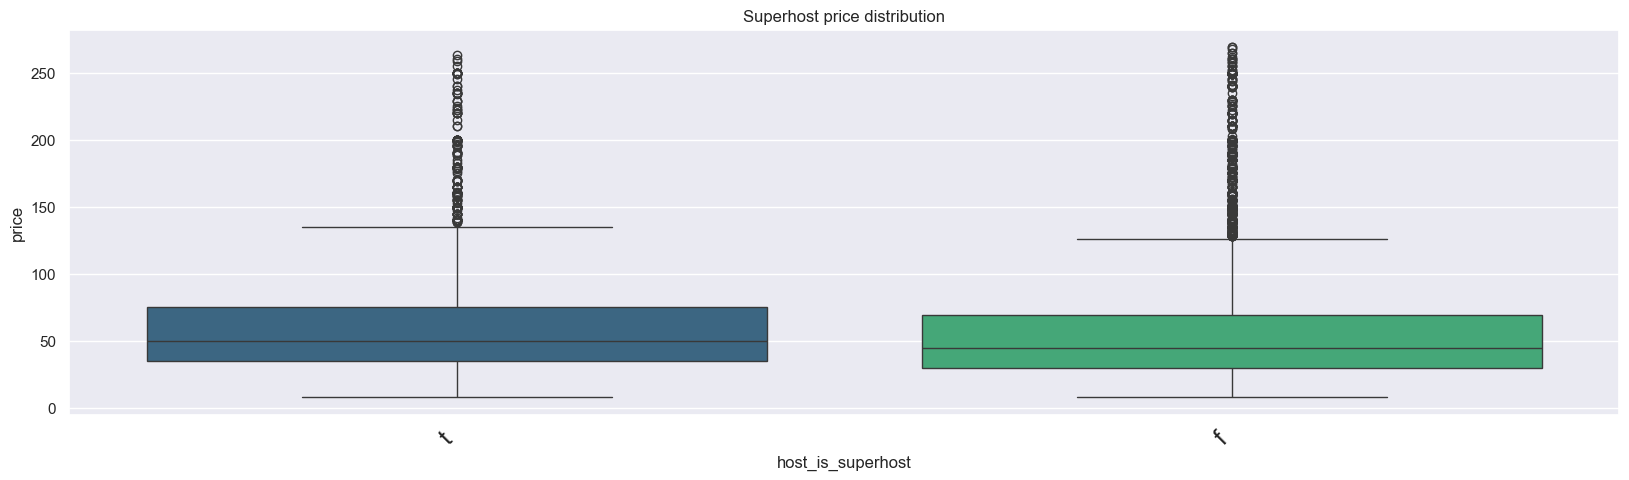

In [168]:
## Let's check if being a superhost has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="host_is_superhost", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Superhost price distribution')
chart;

Judging from the above boxplot, being a superhost has no visible impact on the price. We can definitely try out appropriate Hypothesis Tests to confirm this.

In [169]:
## Let's study Latitude and Longitue features 

lat = listings['latitude'].tolist()
lon = listings['longitude'].tolist()
locations = list(zip(lat, lon))

# 52.5200° N, 13.4050° E is the latitude and longitude of berlin

map1 = folium.Map(location=[52.5200, 13.4050], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1

To better evaluate the location of each listing, we would like to calcuate the distance between each listing and one of the Top5 locations in Berlin. Here we define the Top5 locations as:

Berlin main train station (hbf)
Berlin Tegel Airport (txl)
Brandenburg Tor (btor)
Museum Island (museum)
Reichstag (reichstag)

In [170]:
from math import sin, cos, sqrt, atan2, radians
def distance(lat1, lat2, lon1, lon2):
    R = 6373.0 ## Approx radius of earth in KM
    rlat1 = radians(lat1)
    rlat2 = radians(lat2)
    rlon1 = radians(lon1)
    rlon2 = radians(lon2)
    rdlon = rlon2 - rlon1
    rdlat = rlat2 - rlat1
    a = sin(rdlat / 2)**2 + cos(rlat1) * cos(rlat2) * sin(rdlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [171]:
# Top locations in Berlin
toploc = {"hbf": [52.525293, 13.369359], 
          "txl": [52.558794, 13.288437], 
          "btor": [52.516497, 13.377683], 
          "museum": [52.517693, 13.402141], 
          "reichstag": [52.518770, 13.376166]}
toploc = pd.DataFrame.from_dict(toploc)
toploc_trans = toploc.transpose()
toploc_trans.columns = ["latitude", "longitude"]

# Construct distance columns
dist = []
for col in toploc.columns:
    listings["dist_"+col] = listings.apply(lambda x: distance(x.latitude, toploc[col][0], x.longitude, toploc[col][1]), axis=1)
    dist.append("dist_"+col)
    
   

In [172]:
toploc_trans.columns

Index(['latitude', 'longitude'], dtype='object')

In [173]:
listings.info() ## 5 new variables pertaining to distance are created

<class 'pandas.core.frame.DataFrame'>
Index: 22315 entries, 0 to 22551
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22315 non-null  int64  
 1   scrape_id                         22315 non-null  float64
 2   last_scraped                      22315 non-null  int64  
 3   experiences_offered               22315 non-null  object 
 4   host_id                           22315 non-null  int64  
 5   host_name                         22290 non-null  object 
 6   host_since                        22290 non-null  object 
 7   host_location                     22201 non-null  object 
 8   host_is_superhost                 22315 non-null  object 
 9   host_neighbourhood                17280 non-null  object 
 10  host_listings_count               22290 non-null  float64
 11  host_total_listings_count         22290 non-null  float64
 12  host_veri

In [174]:
## This dictionary contains only the names of the new distance related columns.

dist

['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag']

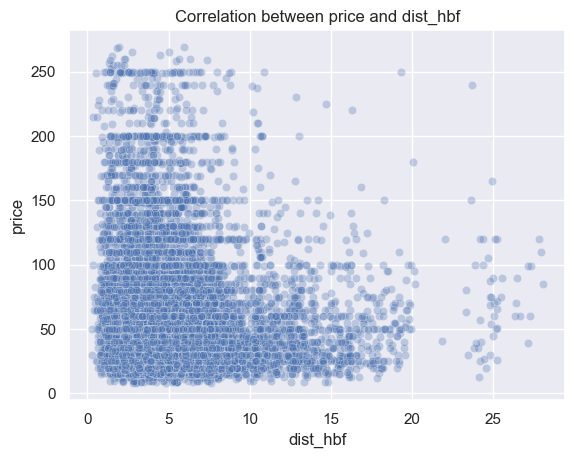

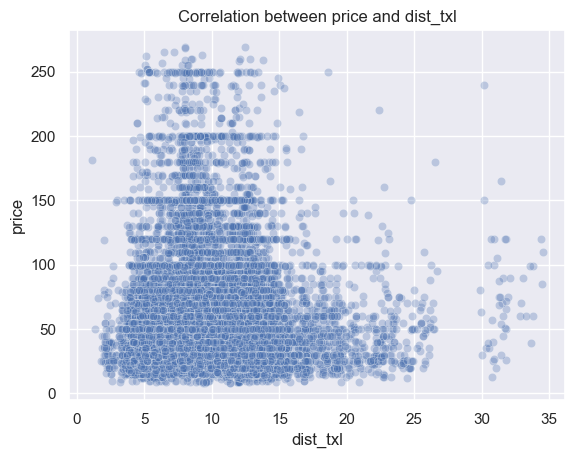

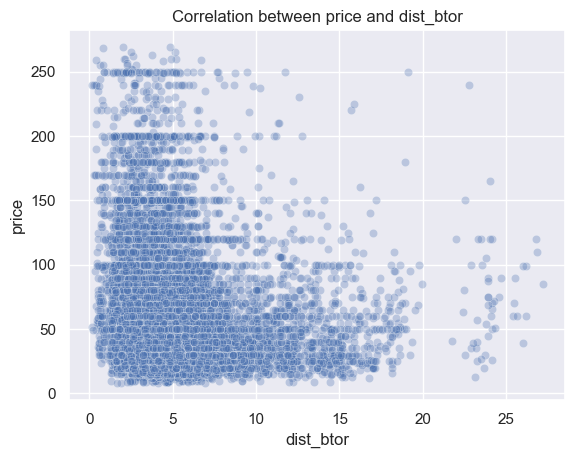

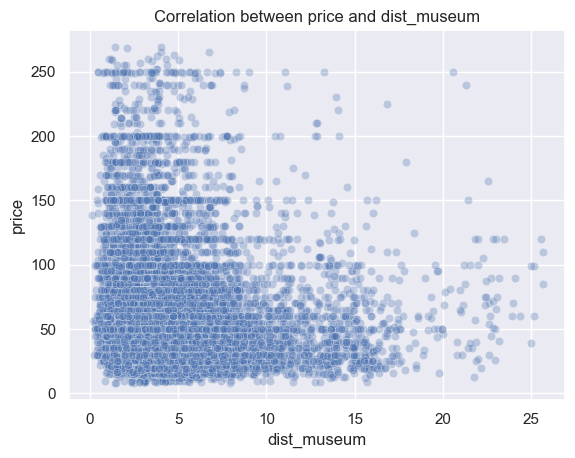

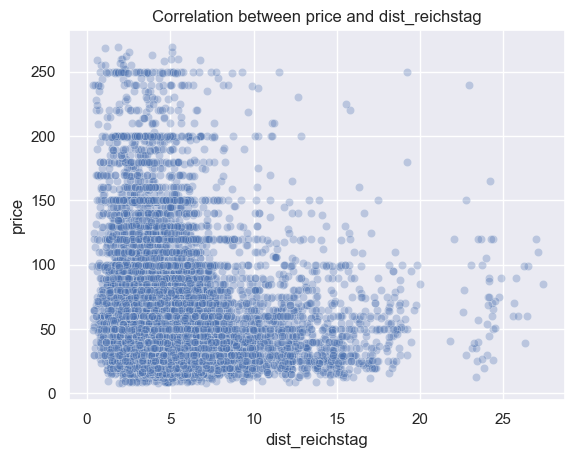

In [175]:
from scipy import stats
for distance in dist:
    sns.scatterplot(x=distance, y="price", data=listings, alpha=0.3)
    plt.title("Correlation between price and "+distance)
    plt.show()

In [176]:
## As similar scatter plot was observed for all distance variables, let's take an average and create a new variable

listings['dist_average'] = listings[['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag']].mean(axis=1) 


In [177]:
listings[['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag','dist_average']].head()

,dist_hbf,dist_txl,dist_btor,dist_museum,dist_reichstag,dist_average
0,2.470531,8.177076,2.619164,1.873802,2.503054,3.528725
1,3.512827,7.935716,3.998364,3.431962,3.825405,4.540855
2,3.436703,9.127423,3.394579,2.189884,3.333330,4.296384
3,3.245779,7.828150,2.757640,4.159571,2.876309,4.173490
4,3.677298,8.740897,3.898852,2.964838,3.780919,4.612561


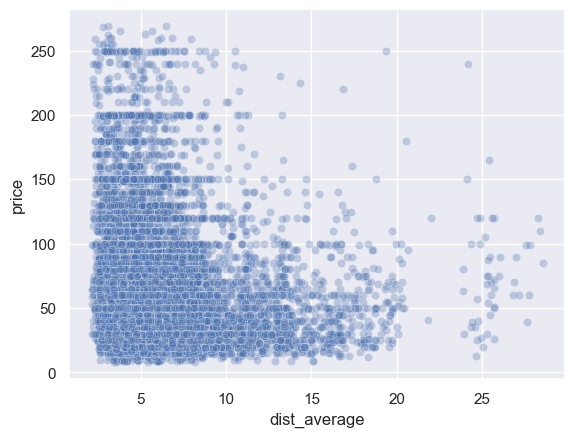

In [178]:
sns.scatterplot(x='dist_average', y="price", data=listings, alpha=0.3);

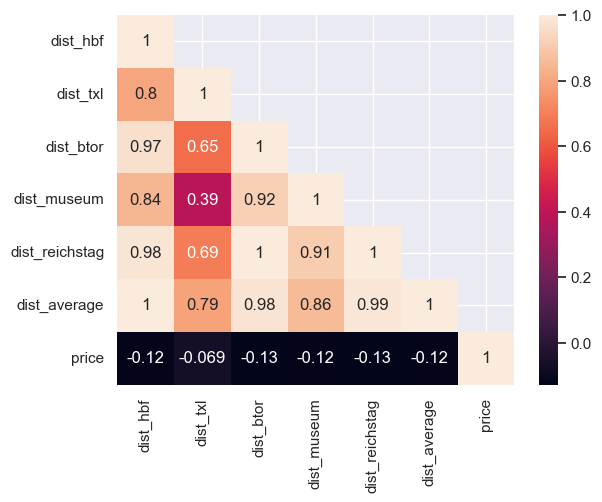

In [179]:
sns.heatmap(listings[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(),
            annot=True,mask=np.triu(listings[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(),+1));

In [180]:
## We could also create a new variable as with a value as "good distance" and "bad distance" wherein distance value 
## from a location to these 5 key centres is lower then it is good distance ..

In [181]:
## Let's see how to deal with a feature which has text values

In [182]:
listings['amenities'].unique()

array(['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}',
       '{Wifi,Kitchen,Elevator,Heating,Washer,Essentials,Shampoo,"Hair dryer","Laptop friendly workspace","Private living room"}',
       '{Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}',
       ...,
       '{Wifi,Kitchen,Heating,Washer,"Fire extinguisher",Essentials,Iron,"Hot water"}',
       '{Wifi,"Paid parking off premises",Doorman,Elevator,Heating,

In [183]:
## Let's identify 10 most frequently occuring amenities in the dataset
from collections import Counter
amenities = Counter()
listings['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(amenities.update)

amenities.most_common(10)

[('Wifi', 21295),
 ('Kitchen', 21135),
 ('Heating', 20993),
 ('Essentials', 20116),
 ('Washer', 18330),
 ('Hair dryer', 14708),
 ('Laptop friendly workspace', 14296),
 ('Hangers', 13728),
 ('Iron', 11042),
 ('Shampoo', 10500)]

In [184]:
## Feature Engineering - Creating a few columns with some amenities that we are looking at.

listings['Laptop_friendly_workspace'] = listings['amenities'].str.contains('Laptop friendly workspace')
listings['TV'] = listings['amenities'].str.contains('TV')
listings['Hot water']=listings['amenities'].str.contains('Hot water')
listings['Family_friendly'] = listings['amenities'].str.contains('Family/kid friendly')
listings['Hair_dryer'] = listings['amenities'].str.contains('Hair_dryer')
listings['Smoking_allowed'] = listings['amenities'].str.contains('Smoking allowed')

In [185]:
### Let's look at the feature list now
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22315 entries, 0 to 22551
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22315 non-null  int64  
 1   scrape_id                         22315 non-null  float64
 2   last_scraped                      22315 non-null  int64  
 3   experiences_offered               22315 non-null  object 
 4   host_id                           22315 non-null  int64  
 5   host_name                         22290 non-null  object 
 6   host_since                        22290 non-null  object 
 7   host_location                     22201 non-null  object 
 8   host_is_superhost                 22315 non-null  object 
 9   host_neighbourhood                17280 non-null  object 
 10  host_listings_count               22290 non-null  float64
 11  host_total_listings_count         22290 non-null  float64
 12  host_veri

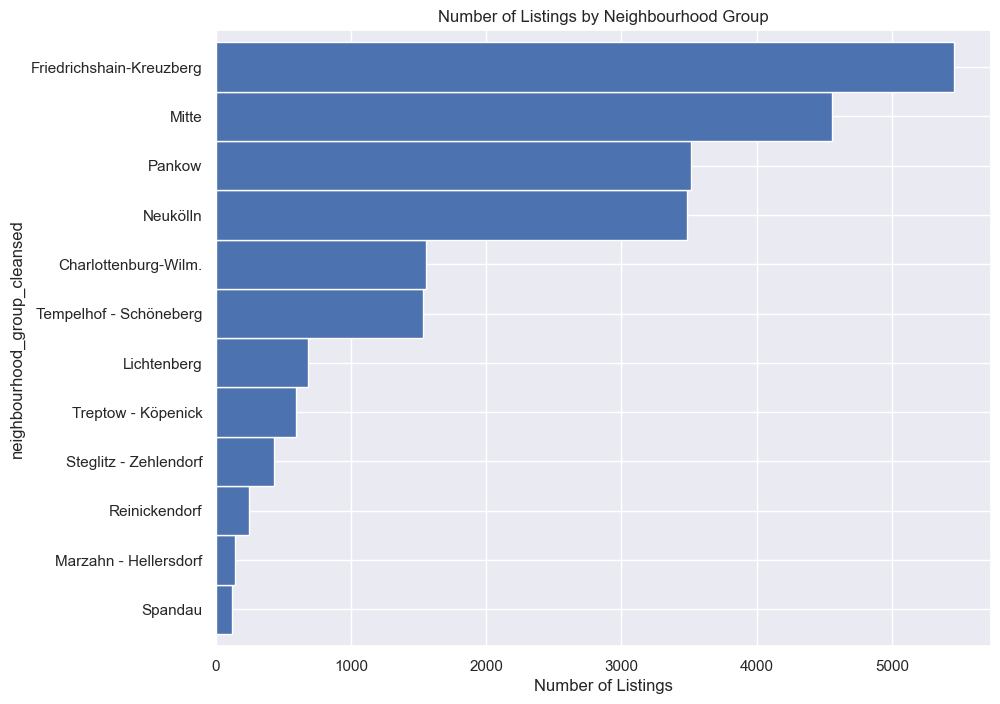

In [186]:
freq = listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel('Number of Listings')
plt.show()

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\1028408397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x="neighbourhood_group_cleansed", y="price", data=listings, palette="viridis")
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\91994\AppData\Local\Programs\Python

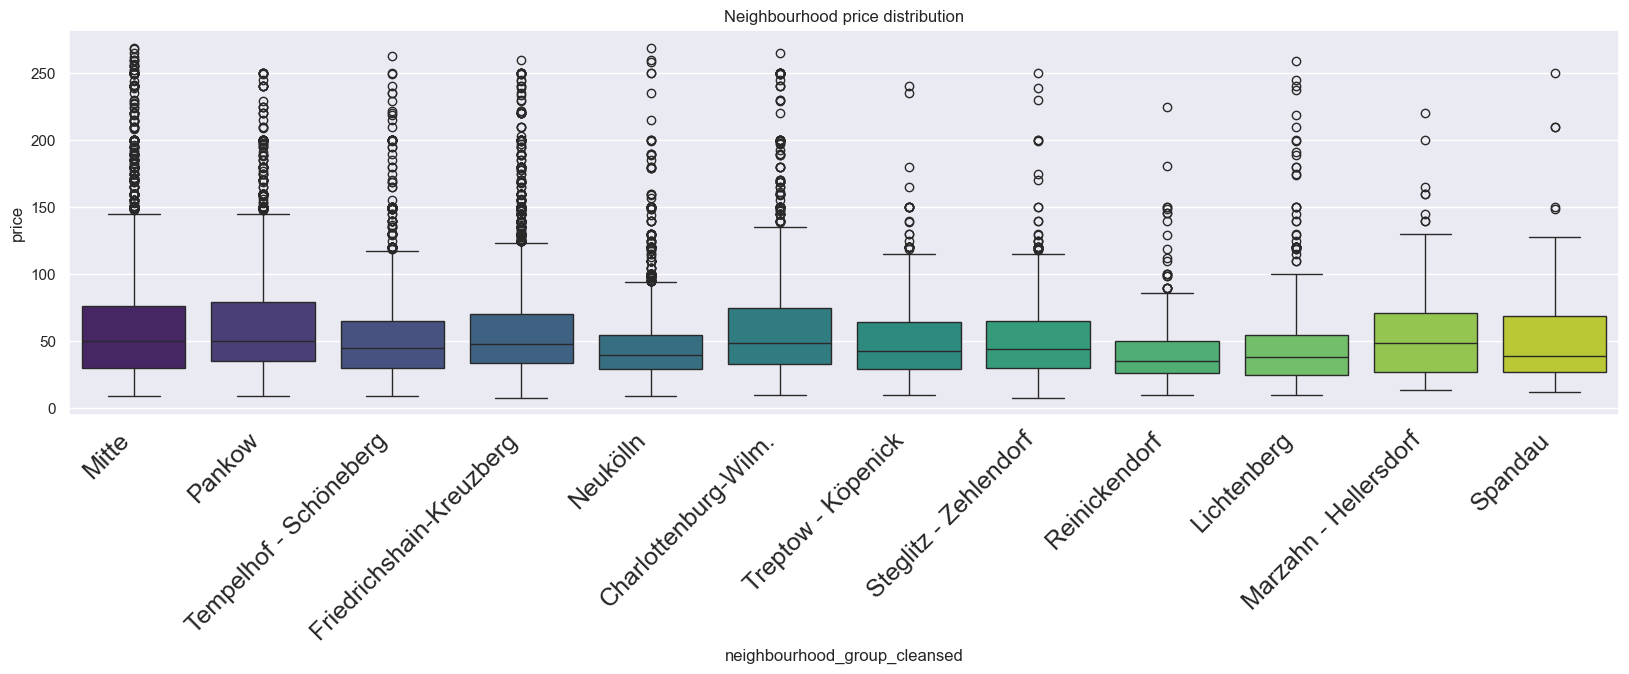

In [187]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="neighbourhood_group_cleansed", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Neighbourhood price distribution')
chart;

Price does vary based on the neighbourhood group, as expected. This conclusion can only be drawn through the graphical plots. For further analysis, appropriate statistical tests can be done. 

Let's analyse the impact on price using a combination of neighbourhood group along with other variables.

bedrooms
1.0    17087
2.0     2926
0.0     1471
3.0      666
4.0      120
5.0       18
6.0        5
8.0        2
7.0        1
9.0        1
Name: count, dtype: int64 



C:\Users\91994\AppData\Local\Temp\ipykernel_20548\1517985569.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bedrooms", y="price", data=listings,palette="summer");
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-package

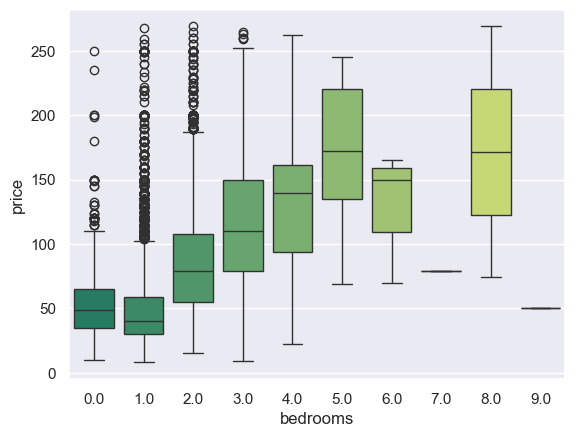

In [188]:
## Let us see the number of bedrooms of each property
print(listings['bedrooms'].value_counts(),'\n')


## How is the distribution of bedrooms with price.. Ideally if number of bedrooms are high, price would be high.
sns.boxplot(x="bedrooms", y="price", data=listings,palette="summer");

In [189]:
listings.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack()

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
neighbourhood_group_cleansed,,,,,,,,,,
Charlottenburg-Wilm.,53.931298,51.940311,93.237209,121.564103,154.857143,240.0,NaN,NaN,NaN,NaN
Friedrichshain-Kreuzberg,52.996933,49.238449,91.045045,123.671875,133.833333,69.0,154.5,79.0,NaN,50.0
Lichtenberg,43.018519,39.896104,81.301587,122.941176,107.333333,245.0,NaN,NaN,NaN,NaN
Marzahn - Hellersdorf,26.000000,40.890110,88.142857,100.750000,138.750000,NaN,117.5,NaN,NaN,NaN
Mitte,56.943284,50.479372,101.034722,135.212644,183.136364,184.2,NaN,NaN,NaN,NaN
Neukölln,47.413613,40.562212,69.545455,100.880000,132.500000,NaN,NaN,NaN,269.0,NaN
Pankow,58.142857,51.673786,90.909926,116.854167,134.718750,157.0,NaN,NaN,NaN,NaN
Reinickendorf,52.916667,36.874317,61.804878,119.625000,83.500000,NaN,NaN,NaN,NaN,NaN
Spandau,47.928571,47.722222,68.562500,62.000000,44.000000,NaN,NaN,NaN,NaN,NaN


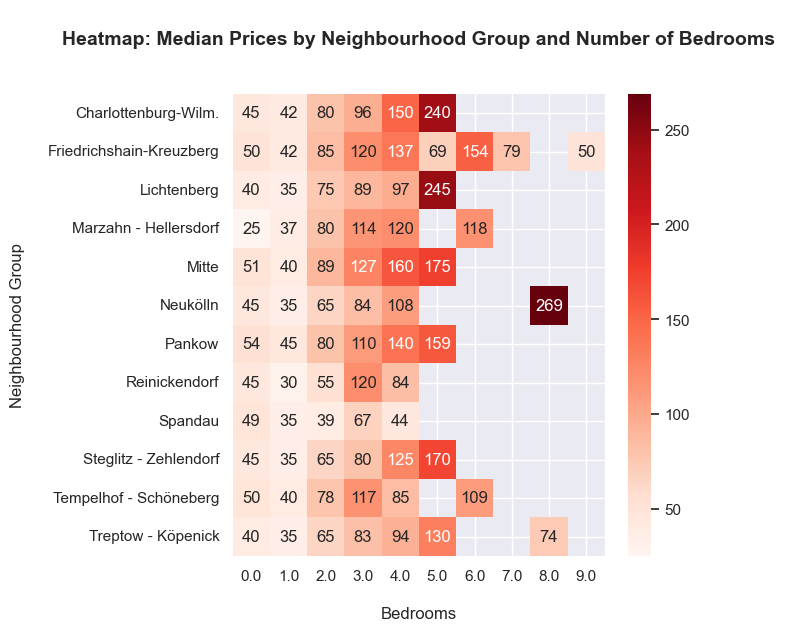

In [190]:
plt.figure(figsize=(6,6))
sns.heatmap(listings.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nBedrooms', fontsize=12)
plt.ylabel('Neighbourhood Group\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood Group and Number of Bedrooms\n\n', fontsize=14, fontweight='bold');

Price difference based on the neighbourbood group and bedrooms is clearly visible. For most of the neighbourhood groups, higher the count of bedroom, higher is the median price.

In [191]:
#### Analyse is_business_travel_ready  
listings['cancellation_policy'].value_counts()

cancellation_policy
flexible                       9025
moderate                       7045
strict_14_with_grace_period    6188
super_strict_30                  48
super_strict_60                   9
Name: count, dtype: int64

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\1336688890.py:4: FutureWarning: The provided callable <function median at 0x0000025E3CB65080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  listings_grouped = pd.DataFrame(listings.groupby(['cancellation_policy'])['price'].agg(np.median))


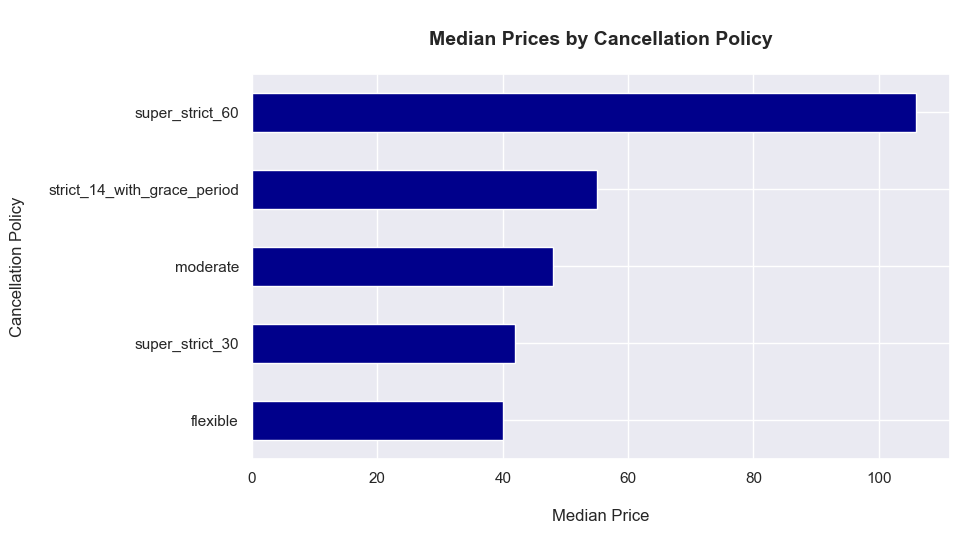

In [192]:
## Let's check the impact of cancellation policy on price

# group_by neighbourhood groups, take the median price and store new values in sub_df 
listings_grouped = pd.DataFrame(listings.groupby(['cancellation_policy'])['price'].agg(np.median))
listings_grouped.reset_index(inplace=True)

# plot this 
listings_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='cancellation_policy', y='price', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('Cancellation Policy\n', fontsize=12)
plt.title('\nMedian Prices by Cancellation Policy\n', fontsize=14, fontweight='bold');

In [193]:
## If cancellation policy is flexible, price of the listing is lower.

In [194]:
## property_type analysis
listings.property_type.unique()

array(['Guesthouse', 'Apartment', 'Condominium', 'Loft', 'House',
       'Serviced apartment', 'Townhouse', 'Boutique hotel',
       'Bed and breakfast', 'Bungalow', 'Boat', 'Guest suite', 'Other',
       'Island', 'Hostel', 'Train', 'Camper/RV', 'Houseboat', 'Cabin',
       'Cottage', 'Tiny house', 'Chalet', 'Castle', 'Villa', 'Aparthotel',
       'Hotel', 'Tipi', 'Resort', 'In-law', 'Cave', 'Barn',
       'Pension (South Korea)', 'Casa particular (Cuba)'], dtype=object)

In [195]:
listings['property_type'].value_counts()

property_type
Apartment                 20098
Condominium                 606
Loft                        439
House                       387
Serviced apartment          150
Hostel                      123
Townhouse                    95
Guest suite                  74
Bed and breakfast            64
Guesthouse                   56
Other                        44
Boutique hotel               36
Hotel                        31
Bungalow                     19
Boat                         14
Tiny house                   12
Camper/RV                    11
Villa                        10
Houseboat                     8
Pension (South Korea)         7
Cabin                         6
Aparthotel                    6
Cottage                       4
Resort                        3
Train                         2
Castle                        2
Casa particular (Cuba)        2
Chalet                        1
Island                        1
Tipi                          1
In-law                    

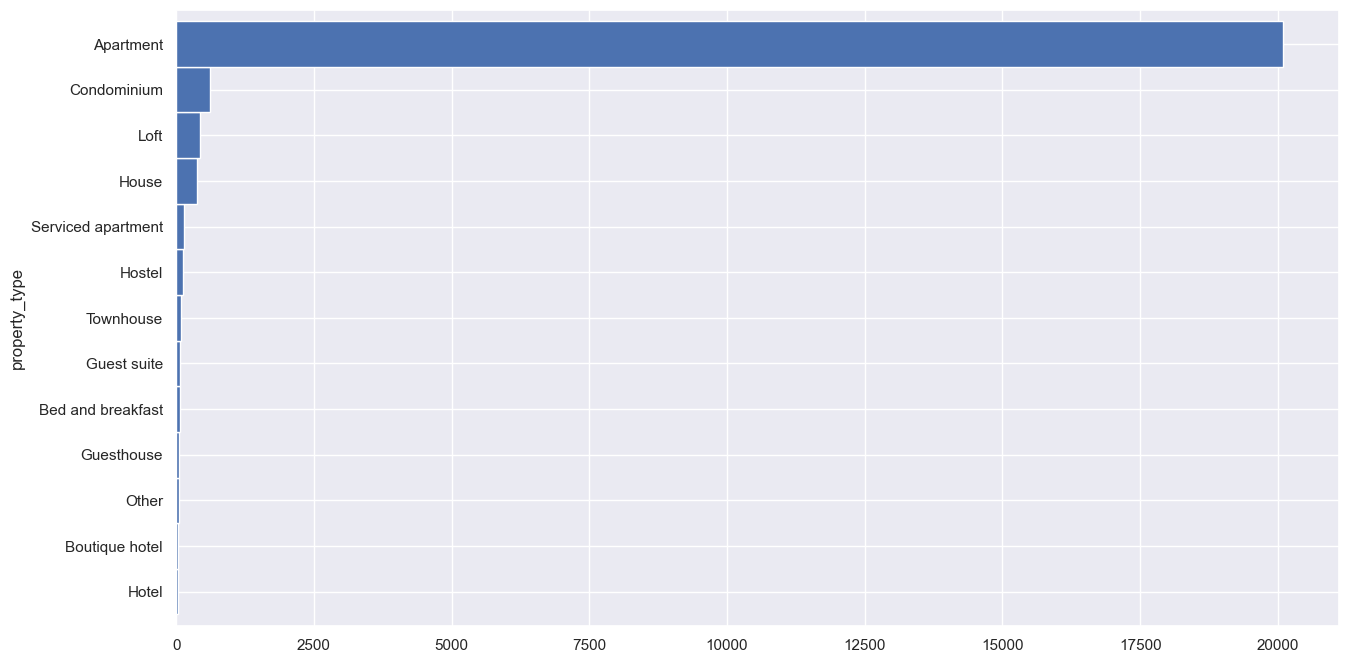

In [196]:
freq = listings['property_type'].value_counts().sort_values(ascending=True)
freq = freq[freq > 20]  # Eliminate types less than 20 counts.
freq.plot.barh(figsize=(15, 8), width=1)
#plt.xscale('log')
plt.show()

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\176965090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x="property_type", y="price", data=listings, palette="viridis")
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\s

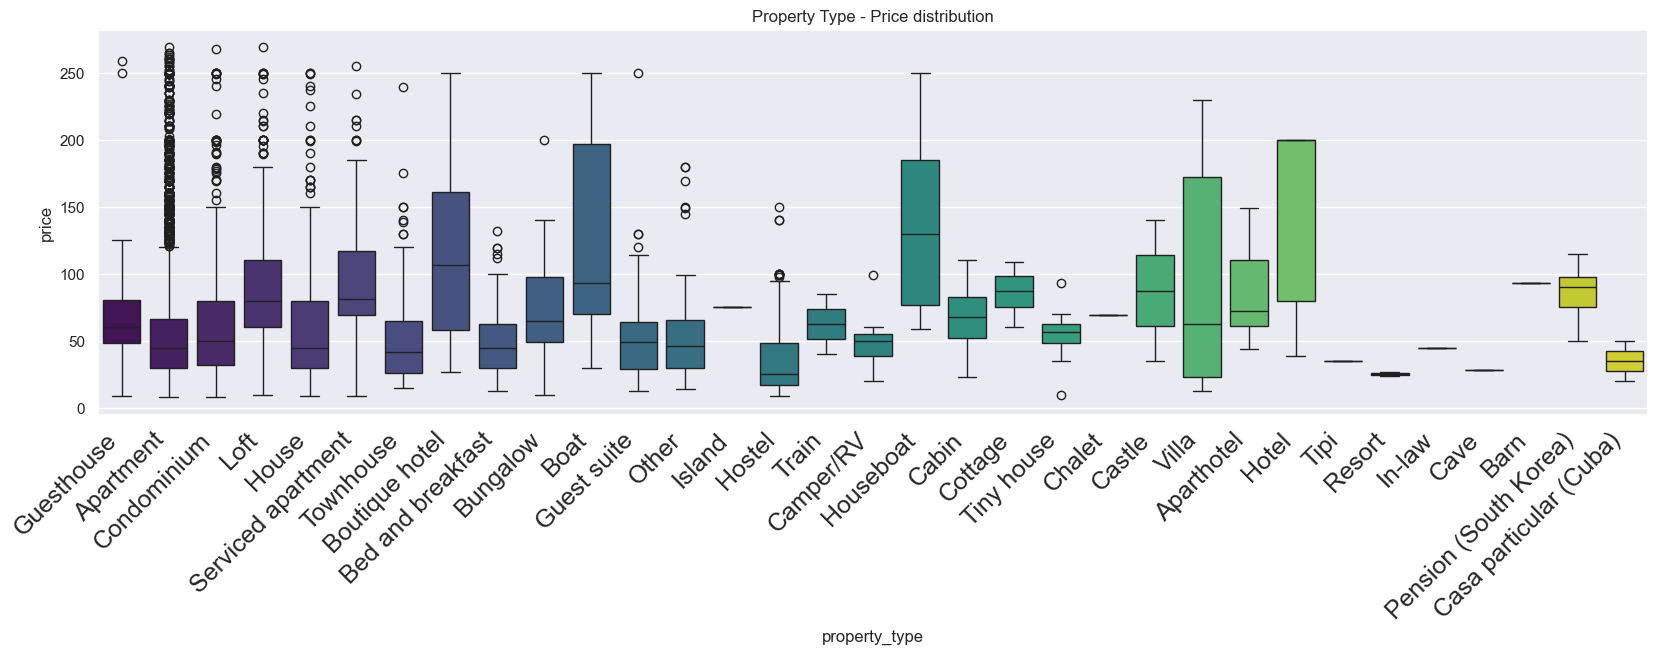

In [197]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="property_type", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Property Type - Price distribution')
chart;

In [198]:
## Most of the listings are Apartment type, so we will consider only Apartment type from the listing data set

listings = listings[(listings.property_type == 'Apartment' )] 


In [199]:
## Study of host_has_profile_pic

listings.host_has_profile_pic.unique()

array(['t', nan, 'f'], dtype=object)

In [200]:
freq = listings['host_has_profile_pic'].value_counts().sort_values(ascending=True)
freq

host_has_profile_pic
f       51
t    20024
Name: count, dtype: int64

In [201]:
## Since it is true in most of the cases, this might not be a hugely significant variable.

In [202]:
listings.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

In [203]:
freq = listings['host_identity_verified'].value_counts().sort_values(ascending=True)
freq

host_identity_verified
t     7886
f    12189
Name: count, dtype: int64

In [204]:
## Treat or drop the variable??

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\444753214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x="host_identity_verified", y="price", data=listings, palette="viridis")
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\91994\AppData\Local\Programs\Python\Python

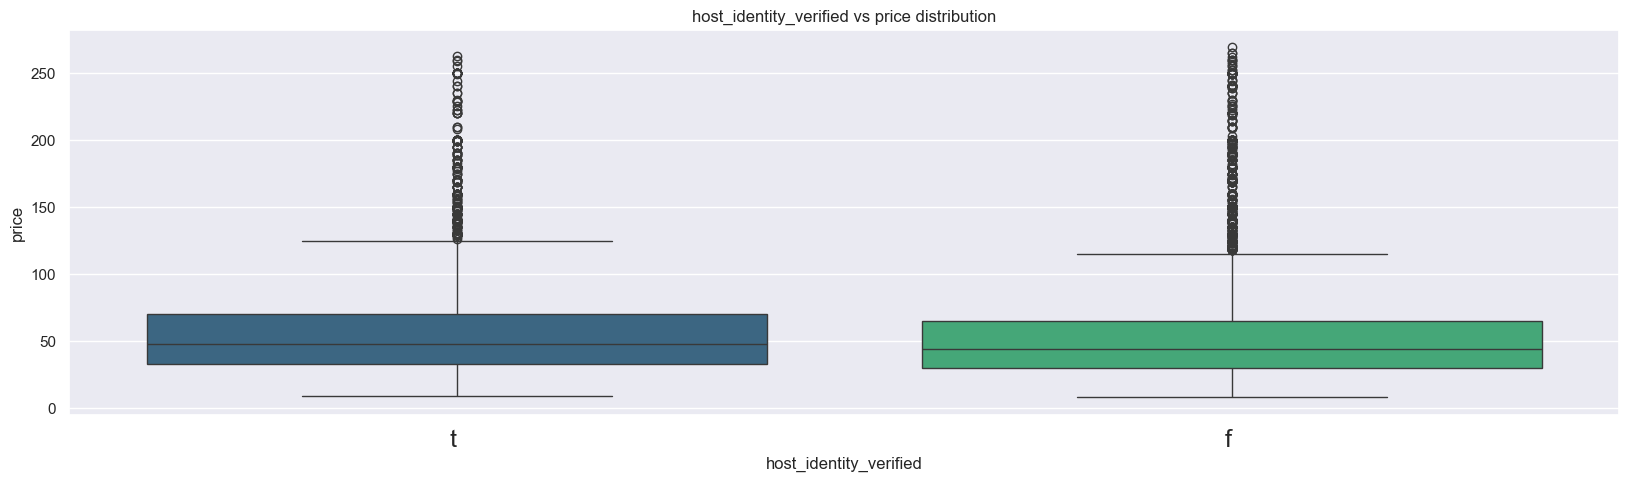

In [205]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="host_identity_verified", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right', fontsize=18)
plt.title('host_identity_verified vs price distribution')
chart;

In [206]:
listings.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

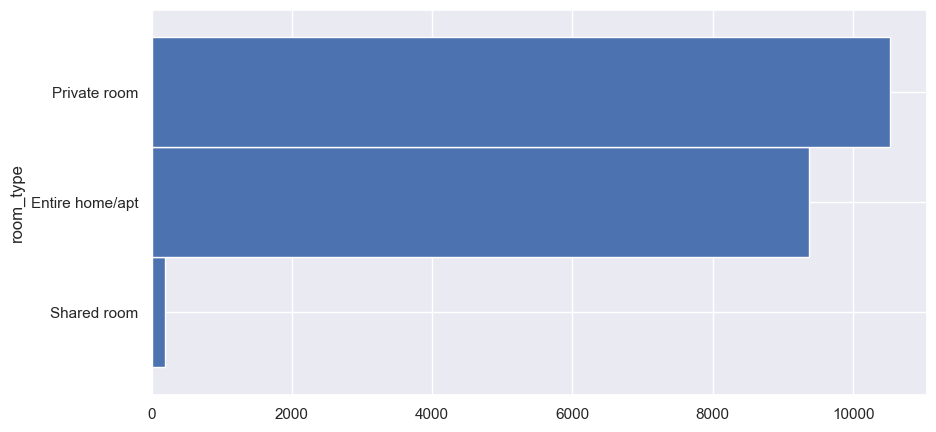

In [207]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 5), width=1)
plt.show()

In [208]:
## Most of the listings have room type as private room followed by Entire home/apt and Shared room

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


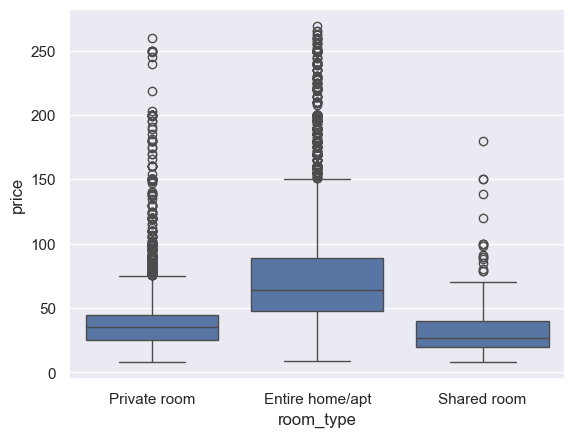

In [209]:
sns.boxplot(x="room_type", y="price", data=listings);

In [210]:
## Price does vary based on room_type

In [211]:
listings['accommodates'].value_counts().sort_index()

accommodates
1      2495
2     11159
3      2249
4      2805
5       578
6       538
7        88
8       104
9        27
10       25
11       10
12       17
13        1
14        1
15        1
Name: count, dtype: int64

In [212]:
## Looks like in Berlin, most of the time 2 travelers occupy a property
## So let's see if accomodates is 2 what is the impact neighbourhood group has on price.. 
## Does Average Daily price for 2 people have any dependency on the neighbourhood group?

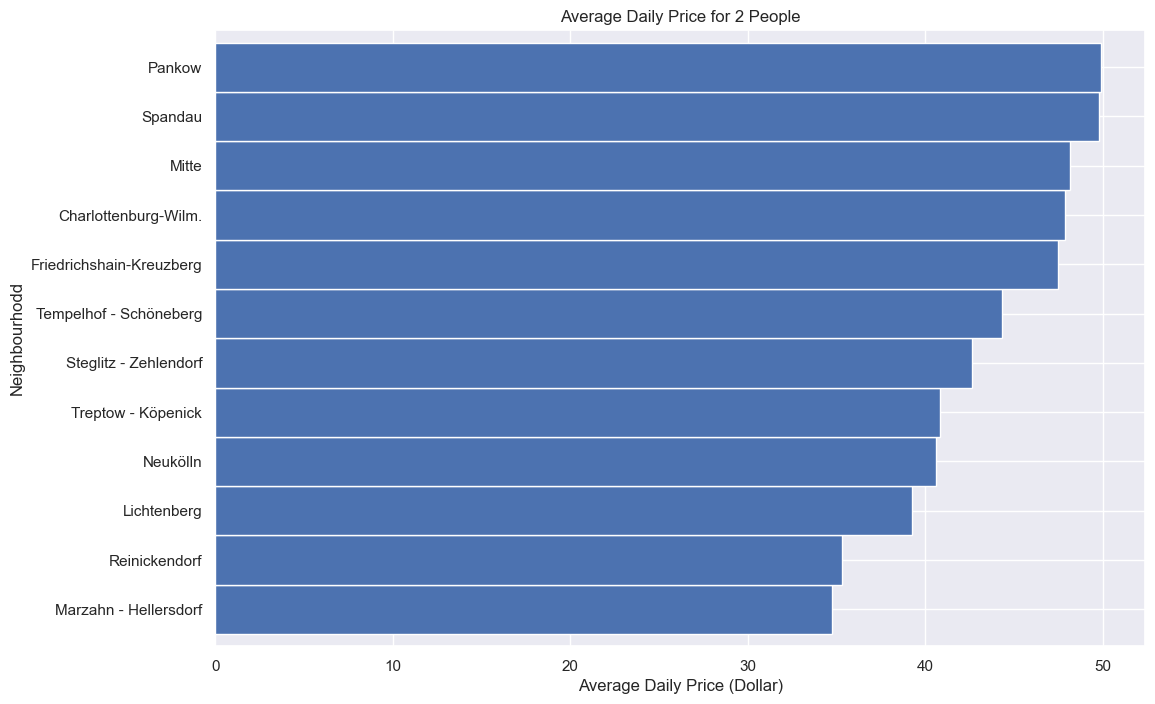

In [213]:
freq = listings[listings['accommodates']==2]
freq = freq.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=True)
freq.plot.barh(figsize=(12, 8), width=1)
plt.title("Average Daily Price for 2 People")
plt.xlabel('Average Daily Price (Dollar)')
plt.ylabel("Neighbourhodd")
plt.show()


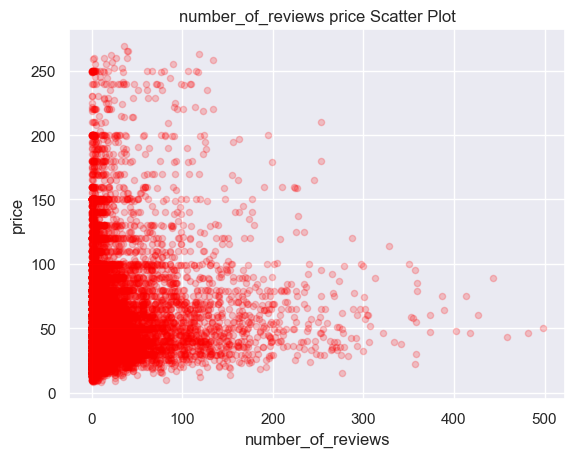

In [214]:
## Study number_of_reviews 

listings.plot(kind='scatter', x='number_of_reviews', y='price',alpha = 0.2,color = 'red')
plt.xlabel('number_of_reviews')              # label = name of label
plt.ylabel('price')
plt.title('number_of_reviews price Scatter Plot')            # title = title of plot
plt.show()

Some of the listings with less count of number of reviews have higher price and even vice versa is also true.. Some of the listings with
high number of reviews have low price.. This is a good observation for sentiment analysis as review comment could help to analyse the sentiment


In [215]:
## Let us check what kind of entries are there in the variable 'experiences_offered'

listings['experiences_offered'].unique()

array(['none'], dtype=object)

We notice that the variable 'experiences_offered' has only one kind of entry so we will not be including this variable in our analysis.

In [216]:
## Let us check the date column. We can use this column to filter and understand how date of the hosts vary.

listings['host_since']

1        16-09-2008
2        19-10-2008
3        07-11-2008
4        16-05-2009
5        25-08-2009
            ...    
22545    02-01-2018
22546    15-09-2014
22547    02-08-2016
22548    17-04-2016
22551    09-03-2018
Name: host_since, Length: 20098, dtype: object

In [217]:
pd.DatetimeIndex(listings['host_since'])

DatetimeIndex(['2008-09-16', '2008-10-19', '2008-07-11', '2009-05-16',
               '2009-08-25', '2009-11-18', '2009-03-12', '2009-12-20',
               '2010-08-01', '2009-12-20',
               ...
               '2015-01-21', '2014-05-09', '2018-06-11', '2017-02-17',
               '2013-10-20', '2018-02-01', '2014-09-15', '2016-02-08',
               '2016-04-17', '2018-09-03'],
              dtype='datetime64[ns]', name='host_since', length=20098, freq=None)

In [218]:
listings['year'] = pd.DatetimeIndex(listings['host_since']).year
listings['year']

1        2008.0
2        2008.0
3        2008.0
4        2009.0
5        2009.0
          ...  
22545    2018.0
22546    2014.0
22547    2016.0
22548    2016.0
22551    2018.0
Name: year, Length: 20098, dtype: float64

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\3304100586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x="year", y="price", data=listings, palette="viridis")
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-pack

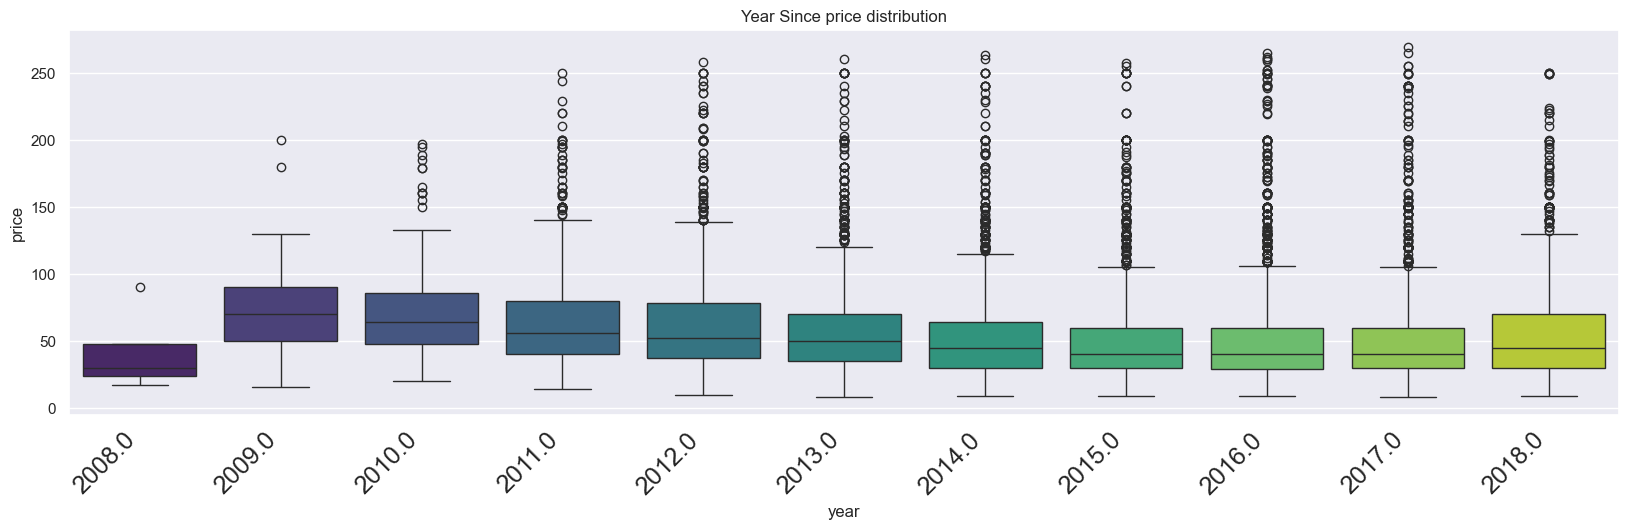

In [219]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="year", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Year Since price distribution')
chart;

In [220]:
# No specific pattern is visible between year since and price.

In [221]:
## is_location_exact - let's analyse this feature now

freq = listings['is_location_exact'].value_counts().sort_values(ascending=True)
freq

is_location_exact
f     5237
t    14861
Name: count, dtype: int64

In [222]:
## Most of the data points have value as Yes.

In [223]:
## Perfect correlation between host_total_listing_count and host_listings_count
listings[['host_total_listings_count','host_listings_count','calculated_host_listings_count']].corr()

,host_total_listings_count,host_listings_count,calculated_host_listings_count
host_total_listings_count,1.000000,1.000000,0.171816
host_listings_count,1.000000,1.000000,0.171816
calculated_host_listings_count,0.171816,0.171816,1.000000


In [224]:
## We should only be inlcuding either one of the perfectly correlated variables

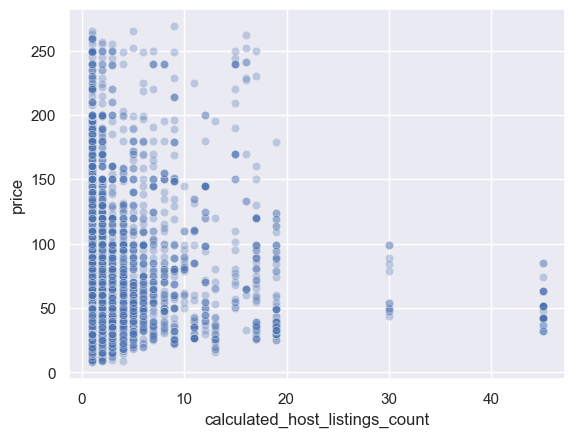

In [225]:
## Analyse calculated_host_listings_count
sns.scatterplot(x='calculated_host_listings_count', y="price", data=listings, alpha=0.3);

In [226]:
## No clear relationship is visible with price.
## We will check how significant is 'calculated_host_listing_count' in the model

In [227]:
## Analysis of bathrooms
listings['bathrooms'].value_counts()

bathrooms
1.0    17980
1.5      973
2.0      942
0.5       88
2.5       39
0.0       22
3.0       13
4.0        5
7.5        2
8.0        2
3.5        1
7.0        1
Name: count, dtype: int64

In [228]:
# We have analysed bedrooms earlier where price was high with high count of bedrooms.. 

listings['bedrooms'].value_counts()

bedrooms
1.0    15549
2.0     2615
0.0     1270
3.0      556
4.0       83
5.0       11
6.0        3
Name: count, dtype: int64

In [229]:
## Analysis of beds
listings['beds'].value_counts()

beds
1.0     13190
2.0      4715
3.0      1153
4.0       588
5.0       189
6.0       124
7.0        38
8.0        34
0.0        20
9.0        10
10.0        7
12.0        3
15.0        2
11.0        1
Name: count, dtype: int64

In [230]:
listings['bed_type'].value_counts()

bed_type
Real Bed         19390
Pull-out Sofa      412
Futon              212
Couch               63
Airbed              21
Name: count, dtype: int64

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\961721099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x="bed_type", y="price", data=listings, palette="viridis")
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-p

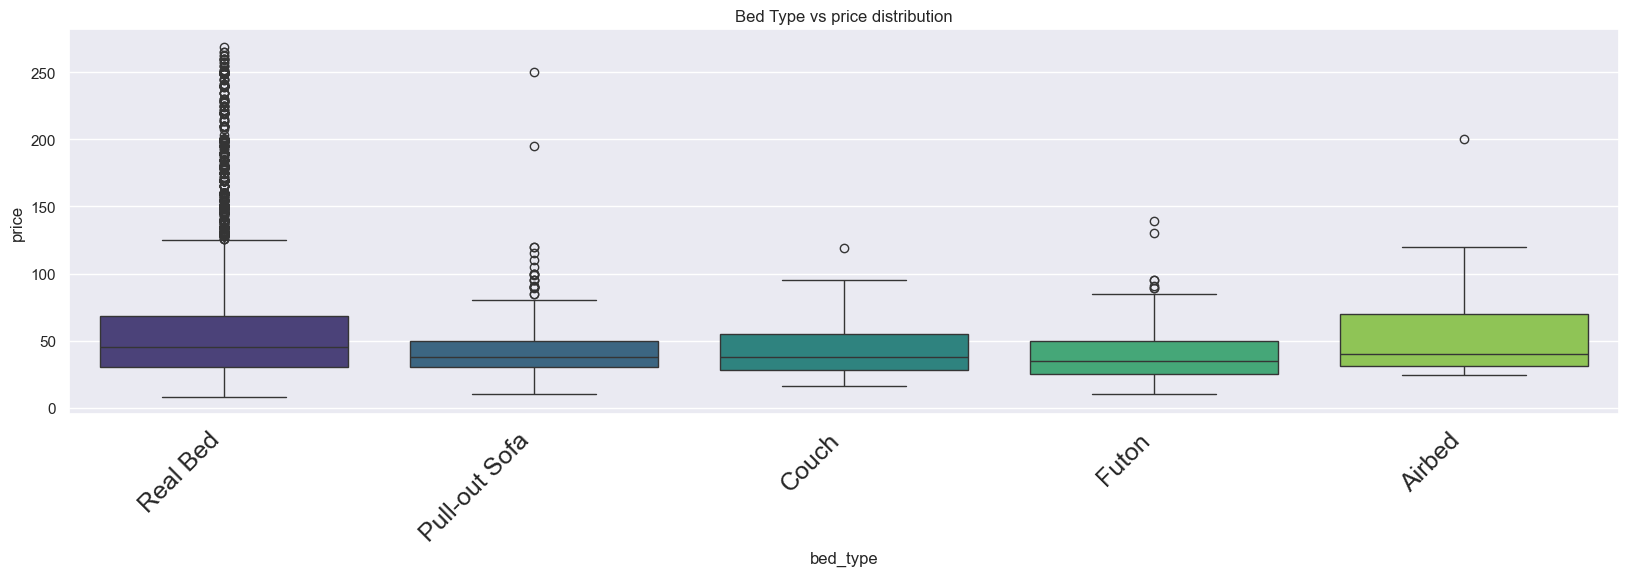

In [231]:
## Price does vary based on bed_type
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="bed_type", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Bed Type vs price distribution')
chart;

In [232]:
## Analyse guests_included

listings['guests_included'].value_counts()

guests_included
1     15754
2      3486
4       411
3       316
6        58
5        46
8         7
16        5
7         5
10        3
9         3
14        1
12        1
11        1
13        1
Name: count, dtype: int64

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\741908009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x="guests_included", y="price", data=listings, palette="viridis")
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib

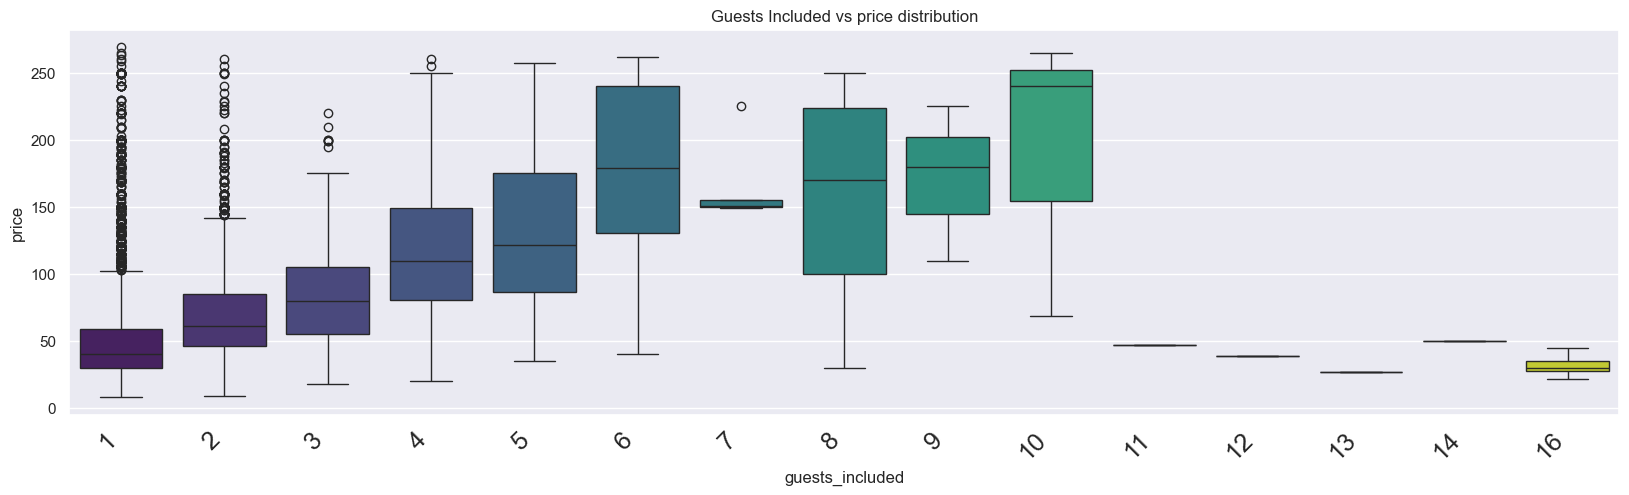

In [233]:
## Price does vary based on guests_included
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="guests_included", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Guests Included vs price distribution')
chart;

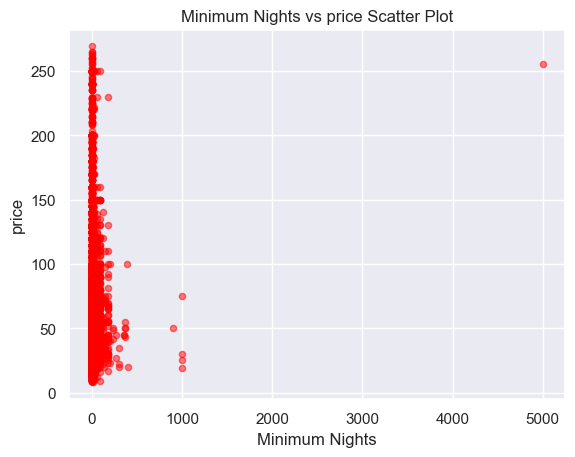

In [234]:
## Let's study the dependence of minimum nights and maximum nights with price

listings.plot(kind='scatter', x='minimum_nights', y='price',alpha = 0.5,color = 'red')
plt.xlabel('Minimum Nights')              # label = name of label
plt.ylabel('price')
plt.title('Minimum Nights vs price Scatter Plot')            # title = title of plot
plt.show()

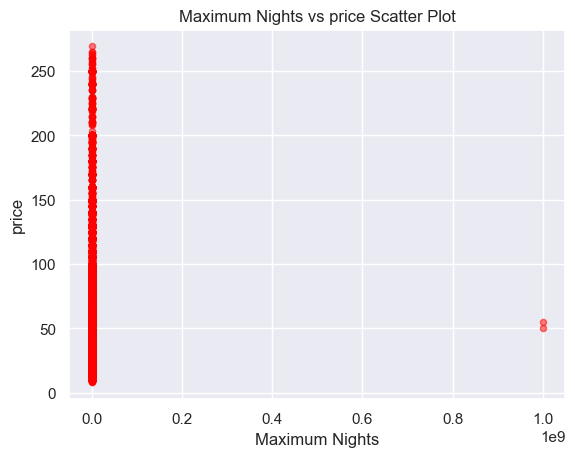

In [235]:
## Let's study the dependence of minimum nights and maximum nights with price

listings.plot(kind='scatter', x='maximum_nights', y='price',alpha = 0.5,color = 'red')
plt.xlabel('Maximum Nights')              # label = name of label
plt.ylabel('price')
plt.title('Maximum Nights vs price Scatter Plot')            # title = title of plot
plt.show()

In [236]:
## Analyse has_availability

listings['has_availability'].value_counts()

has_availability
t    20098
Name: count, dtype: int64

In [237]:
## There is no variation in this variable and thus ideally this should not be used in the model.

In [238]:
## availability_30 indicates how many days room is available in the next 30 day. 
## Based on availability price could vary and hence all the features related to availability will be used in the model

In [239]:
listings['availability_30'].value_counts()

availability_30
0     13444
6       446
1       413
4       386
5       346
29      332
2       318
3       313
7       279
30      257
8       257
9       230
12      196
14      196
11      195
23      191
10      187
27      187
28      186
15      173
13      164
20      156
17      156
16      156
18      155
19      146
25      144
22      140
21      135
24      115
26       99
Name: count, dtype: int64

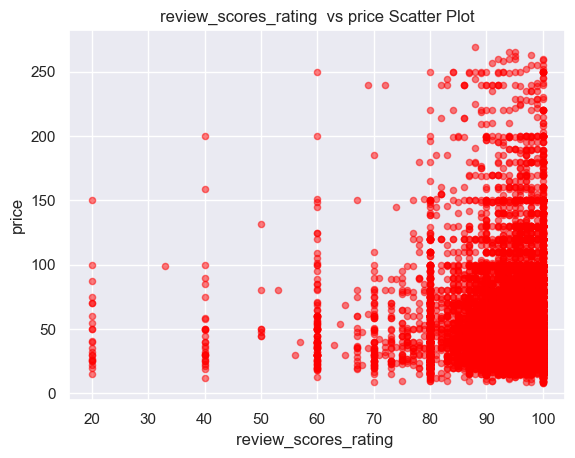

In [240]:
## Let's study the review_scores_rating with price

listings.plot(kind='scatter', x='review_scores_rating', y='price',alpha = 0.5,color = 'red')
plt.xlabel('review_scores_rating ')              # label = name of label
plt.ylabel('price')
plt.title('review_scores_rating  vs price Scatter Plot')            # title = title of plot
plt.show()

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


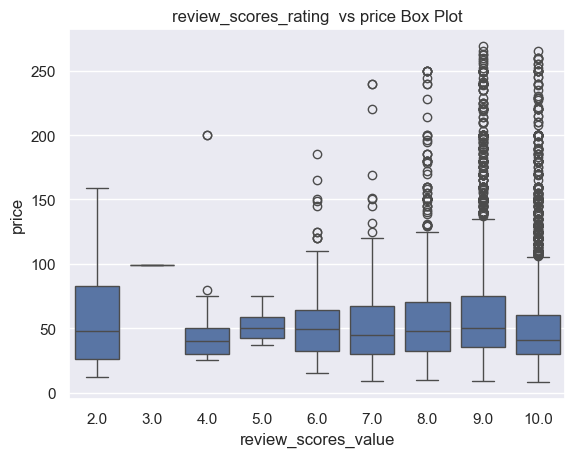

In [241]:
## Let's also study the review_scores_value with price

sns.boxplot(x='review_scores_value',y='price',data=listings)

plt.title('review_scores_rating  vs price Box Plot')
plt.show()

In [242]:
## Analyse instant_bookable
listings['instant_bookable'].value_counts()

instant_bookable
f    13988
t     6110
Name: count, dtype: int64

In [243]:
#### Analyse requires_license
listings['requires_license'].value_counts()

requires_license
t    20094
f        4
Name: count, dtype: int64

In [244]:
## No variation in the 'requires_license' variable

In [245]:
#### Analyse is_business_travel_ready  
listings['is_business_travel_ready'].value_counts()

is_business_travel_ready
f    20098
Name: count, dtype: int64

In [246]:
## No variation in the 'is_business_travel_ready' variable

In [247]:
#### Analyse require_guest_profile_picture
listings['require_guest_profile_picture'].value_counts()

require_guest_profile_picture
f    19962
t      136
Name: count, dtype: int64

In [248]:
#### Analyse require_guest_profile_picture
listings['require_guest_phone_verification'].value_counts()

require_guest_phone_verification
f    19879
t      219
Name: count, dtype: int64

In [249]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20098 entries, 1 to 22551
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20098 non-null  int64  
 1   scrape_id                         20098 non-null  float64
 2   last_scraped                      20098 non-null  int64  
 3   experiences_offered               20098 non-null  object 
 4   host_id                           20098 non-null  int64  
 5   host_name                         20075 non-null  object 
 6   host_since                        20075 non-null  object 
 7   host_location                     19994 non-null  object 
 8   host_is_superhost                 20098 non-null  object 
 9   host_neighbourhood                15452 non-null  object 
 10  host_listings_count               20075 non-null  float64
 11  host_total_listings_count         20075 non-null  float64
 12  host_veri

In [250]:
## Let's convert year into object type variable
listings['year']= listings['year'].astype(object)


In [251]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20098 entries, 1 to 22551
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20098 non-null  int64  
 1   scrape_id                         20098 non-null  float64
 2   last_scraped                      20098 non-null  int64  
 3   experiences_offered               20098 non-null  object 
 4   host_id                           20098 non-null  int64  
 5   host_name                         20075 non-null  object 
 6   host_since                        20075 non-null  object 
 7   host_location                     19994 non-null  object 
 8   host_is_superhost                 20098 non-null  object 
 9   host_neighbourhood                15452 non-null  object 
 10  host_listings_count               20075 non-null  float64
 11  host_total_listings_count         20075 non-null  float64
 12  host_veri

In [252]:
listings = pd.get_dummies(listings, columns=['host_is_superhost','host_identity_verified','neighbourhood_group_cleansed','is_location_exact','property_type','room_type','bed_type','instant_bookable','cancellation_policy','Laptop_friendly_workspace','TV','Hot water','Family_friendly','Hair_dryer','Smoking_allowed','year'],drop_first=True)

In [253]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20098 entries, 1 to 22551
Columns: 105 entries, id to year_2018.0
dtypes: bool(40), float64(25), int32(1), int64(14), object(25)
memory usage: 10.8+ MB


In [254]:
pd.set_option("display.max_columns", None)
listings.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,dist_hbf,dist_txl,dist_btor,dist_museum,dist_reichstag,dist_average,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Marzahn - Hellersdorf,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,is_location_exact_t,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Laptop_friendly_workspace_True,TV_True,Hot water_True,Family_friendly_True,Smoking_allowed_True,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,2,1.0,1.0,1.0,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,f,1,1.42,3.512827,7.935716,3.998364,3.431962,3.825405,4.540855,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,4,1.0,1.0,2.0,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,50,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,f,f,f,1,1.25,3.436703,9.127423,3.394579,2.189884,3.333330,4.296384,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,2,1.0,1.0,1.0,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,30,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,43411,25,414

In [255]:
listings.rename(columns = {'neighbourhood_group_cleansed_Marzahn - Hellersdorf':'neighbourhood_group_cleansed_Marzahn_Hellersdorf','neighbourhood_group_cleansed_Steglitz - Zehlendorf':'neighbourhood_group_cleansed_Steglitz_Zehlendorf','neighbourhood_group_cleansed_Tempelhof - Schöneberg':'neighbourhood_group_cleansed_Tempelhof_Schöneberg', 'neighbourhood_group_cleansed_Treptow - Köpenick':'neighbourhood_group_cleansed_Treptow_Köpenick','bed_type_Pull-out Sofa':'bed_type_Pull_out_Sofa', 'bed_type_Real Bed':'bed_type_Real_Bed','room_type_Private room':'room_type_Private_room','room_type_Shared room':'room_type_Shared_room','Hot water_True':'Hot_water_True', 'year_2009.0':'year_2009','year_2010.0':'year_2010','year_2011.0':'year_2011','year_2012.0':'year_2012','year_2013.0':'year_2013','year_2014.0':'year_2014','year_2015.0':'year_2015','year_2016.0':'year_2016','year_2017.0':'year_2017','year_2018.0':'year_2018'}, inplace=True)


In [256]:
listings_new = listings[['host_total_listings_count','accommodates','guests_included','availability_30','availability_60',
'availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy',
'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
'review_scores_value','calculated_host_listings_count','dist_average','bathrooms','bedrooms',
'host_is_superhost_t','host_identity_verified_t','neighbourhood_group_cleansed_Lichtenberg',
'neighbourhood_group_cleansed_Mitte','neighbourhood_group_cleansed_Neukölln',
'neighbourhood_group_cleansed_Tempelhof_Schöneberg','neighbourhood_group_cleansed_Treptow_Köpenick',
'neighbourhood_group_cleansed_Steglitz_Zehlendorf','neighbourhood_group_cleansed_Pankow',
'neighbourhood_group_cleansed_Marzahn_Hellersdorf','neighbourhood_group_cleansed_Reinickendorf',
'neighbourhood_group_cleansed_Spandau','is_location_exact_t','room_type_Private_room','room_type_Shared_room',                               
'bed_type_Couch','bed_type_Futon','bed_type_Pull_out_Sofa','bed_type_Real_Bed','instant_bookable_t',
'cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period','cancellation_policy_super_strict_30',
'cancellation_policy_super_strict_60','Laptop_friendly_workspace_True','TV_True','Hot_water_True','Family_friendly_True',
'Smoking_allowed_True','year_2009','year_2010','year_2011','year_2012','year_2013','year_2014','year_2015','year_2016',
'year_2017','year_2018','price']]

In [257]:
listings_new.isna().sum()

host_total_listings_count                              23
accommodates                                            0
guests_included                                         0
availability_30                                         0
availability_60                                         0
availability_90                                         0
availability_365                                        0
number_of_reviews                                       0
review_scores_rating                                 3847
review_scores_accuracy                               3869
review_scores_cleanliness                            3867
review_scores_checkin                                3884
review_scores_communication                          3870
review_scores_location                               3883
review_scores_value                                  3887
calculated_host_listings_count                          0
dist_average                                            0
bathrooms     

In [258]:
## We will drop host_neighbourhood as inputation of this object type of variable using mode will not be accurate from analysis perspective
## If we use drop na then we will loose lot of rows wherein we do have data points for other feature hence drop na without imputation 
## and /or deleting the columns is not recommended
## All features pertaining to review with missing values, imputation would be done using median

listings_new["review_scores_value"].replace(np.nan,listings_new["review_scores_value"].median(),inplace=True)
listings_new["review_scores_checkin"].replace(np.nan,listings_new["review_scores_checkin"].median(),inplace=True)
listings_new["review_scores_location"].replace(np.nan,listings_new["review_scores_location"].median(),inplace=True)
listings_new["review_scores_communication"].replace(np.nan,listings_new["review_scores_communication"].median(),inplace=True)
listings_new["review_scores_accuracy"].replace(np.nan,listings_new["review_scores_accuracy"].median(),inplace=True)
listings_new["review_scores_cleanliness"].replace(np.nan,listings_new["review_scores_cleanliness"].median(),inplace=True)
listings_new["review_scores_rating"].replace(np.nan,listings_new["review_scores_rating"].median(),inplace=True)

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\1088900733.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_new["review_scores_value"].replace(np.nan,listings_new["review_scores_value"].median(),inplace=True)
C:\Users\91994\AppData\Local\Temp\ipykernel_20548\1088900733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_

In [259]:
listings_new.isna().sum()

host_total_listings_count                            23
accommodates                                          0
guests_included                                       0
availability_30                                       0
availability_60                                       0
availability_90                                       0
availability_365                                      0
number_of_reviews                                     0
review_scores_rating                                  0
review_scores_accuracy                                0
review_scores_cleanliness                             0
review_scores_checkin                                 0
review_scores_communication                           0
review_scores_location                                0
review_scores_value                                   0
calculated_host_listings_count                        0
dist_average                                          0
bathrooms                                       

In [260]:
## Let's drop these missing values 
listings_new.dropna(axis=0, inplace=True)

## Discussion whether to drop the missing values or impute the missing values

C:\Users\91994\AppData\Local\Temp\ipykernel_20548\1387417564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_new.dropna(axis=0, inplace=True)


In [261]:
listings_new.isna().sum()

host_total_listings_count                            0
accommodates                                         0
guests_included                                      0
availability_30                                      0
availability_60                                      0
availability_90                                      0
availability_365                                     0
number_of_reviews                                    0
review_scores_rating                                 0
review_scores_accuracy                               0
review_scores_cleanliness                            0
review_scores_checkin                                0
review_scores_communication                          0
review_scores_location                               0
review_scores_value                                  0
calculated_host_listings_count                       0
dist_average                                         0
bathrooms                                            0
bedrooms  

In [262]:
# Split the data into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split

Train, Test = train_test_split(listings_new, test_size=0.30 , random_state=1)

In [263]:
from IPython.display import display

In [264]:
display(Train.head())

print(Train.shape)

,host_total_listings_count,accommodates,guests_included,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,dist_average,bathrooms,bedrooms,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Tempelhof_Schöneberg,neighbourhood_group_cleansed_Treptow_Köpenick,neighbourhood_group_cleansed_Steglitz_Zehlendorf,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Marzahn_Hellersdorf,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,is_location_exact_t,room_type_Private_room,room_type_Shared_room,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Laptop_friendly_workspace_True,TV_True,Hot_water_True,Family_friendly_True,Smoking_allowed_True,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,price
13984,1.0,2,1,0,0,0,0,2,80.0,9.0,6.0,9.0,10.0,8.0,8.0,1,3.890794,1.5,1.0,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,20.0
19097,3.0,2,1,0,0,0,0,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.213830,1.0,1.0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,35.0
9454,1.0,1,1,0,0,0,0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,7.265014,1.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,25.0
18767,1.0,2,1,0,0,0,0,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,7.155850,1.0,1.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,60.0
2456,1.0,2,1,0,0,0,0,6,93.0,9.0,9.0,10.0,9.0,9.0,9.0,1,5.923596,1.0,1.0,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,29.0


(14023, 59)


In [265]:
display(Test.head())

print(Test.shape)

,host_total_listings_count,accommodates,guests_included,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,dist_average,bathrooms,bedrooms,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Tempelhof_Schöneberg,neighbourhood_group_cleansed_Treptow_Köpenick,neighbourhood_group_cleansed_Steglitz_Zehlendorf,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Marzahn_Hellersdorf,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,is_location_exact_t,room_type_Private_room,room_type_Shared_room,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Laptop_friendly_workspace_True,TV_True,Hot_water_True,Family_friendly_True,Smoking_allowed_True,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,price
14914,2.0,4,2,21,48,74,264,58,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,4.510624,1.0,1.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,49.0
16489,1.0,1,1,0,0,0,0,5,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.321683,2.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,39.0
4326,1.0,4,2,0,0,0,0,9,89.0,9.0,10.0,9.0,10.0,9.0,8.0,1,6.930379,1.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,True,True,True,True,False,False,False,True,False,False,False,False,False,False,100.0
975,1.0,2,1,19,49,59,59,40,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1,3.452970,1.0,1.0,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,29.0
12948,1.0,2,1,9,9,9,9,67,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.615030,1.0,1.0,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,35.0


(6011, 59)


In [266]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ host_total_listings_count+accommodates+guests_included+availability_30+availability_60+availability_90+availability_365+number_of_reviews+review_scores_rating+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+calculated_host_listings_count+dist_average+bathrooms+bedrooms+host_is_superhost_t+host_identity_verified_t+neighbourhood_group_cleansed_Lichtenberg++neighbourhood_group_cleansed_Mitte+neighbourhood_group_cleansed_Neukölln+neighbourhood_group_cleansed_Tempelhof_Schöneberg+neighbourhood_group_cleansed_Treptow_Köpenick+neighbourhood_group_cleansed_Steglitz_Zehlendorf+neighbourhood_group_cleansed_Pankow+neighbourhood_group_cleansed_Marzahn_Hellersdorf+neighbourhood_group_cleansed_Reinickendorf+neighbourhood_group_cleansed_Spandau+is_location_exact_t+room_type_Private_room+room_type_Shared_room+bed_type_Couch+bed_type_Futon+bed_type_Pull_out_Sofa+bed_type_Real_Bed+instant_bookable_t+cancellation_policy_moderate+cancellation_policy_strict_14_with_grace_period+cancellation_policy_super_strict_30+cancellation_policy_super_strict_60+Laptop_friendly_workspace_True+TV_True+Hot_water_True+Family_friendly_True+Smoking_allowed_True+year_2009+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015+year_2016+year_2017+year_2018',data = Train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     249.8
Date:                Tue, 14 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:45:37   Log-Likelihood:                -64724.
No. Observations:               14023   AIC:                         1.296e+05
Df Residuals:                   13964   BIC:                         1.300e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [267]:
#####################Iteration 2 ###### How do we improve the model??

In [270]:
## let's check the vif value

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_cal(input_data):
    # Ensure all variables are numeric
    input_data = input_data.select_dtypes(include=['number'])
    
    # Add a constant column for the intercept
    X = sm.add_constant(input_data)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = input_data.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i + 1) for i in range(len(input_data.columns))]
    
    return vif_data


In [271]:
vif_cal(input_data=Train.drop('price',axis=1))

,Feature,VIF
0,host_total_listings_count,1.032931
1,accommodates,1.939878
2,guests_included,1.336348
3,availability_30,8.847878
4,availability_60,24.377636
5,availability_90,13.790043
6,availability_365,2.107396
7,number_of_reviews,1.140634
8,review_scores_rating,2.984141
9,review_scores_accuracy,2.129076


In [272]:
vif_cal(input_data=Train.drop(['price','availability_60'],axis=1))

,Feature,VIF
0,host_total_listings_count,1.032863
1,accommodates,1.939430
2,guests_included,1.336113
3,availability_30,3.799070
4,availability_90,5.270375
5,availability_365,2.066538
6,number_of_reviews,1.135290
7,review_scores_rating,2.983892
8,review_scores_accuracy,2.129071
9,review_scores_cleanliness,1.946639


In [273]:
lm2 = smf.ols(formula= 'price ~ accommodates+guests_included+availability_30+availability_90+availability_365+number_of_reviews+review_scores_rating+review_scores_cleanliness+review_scores_communication+review_scores_location+review_scores_value+calculated_host_listings_count+dist_average+bathrooms+bedrooms+host_is_superhost_t+neighbourhood_group_cleansed_Mitte+neighbourhood_group_cleansed_Neukölln+neighbourhood_group_cleansed_Tempelhof_Schöneberg+neighbourhood_group_cleansed_Steglitz_Zehlendorf+neighbourhood_group_cleansed_Pankow+neighbourhood_group_cleansed_Reinickendorf+neighbourhood_group_cleansed_Spandau+room_type_Private_room+room_type_Shared_room+bed_type_Couch+bed_type_Futon+bed_type_Pull_out_Sofa+bed_type_Real_Bed+instant_bookable_t+cancellation_policy_moderate+cancellation_policy_strict_14_with_grace_period+cancellation_policy_super_strict_30+Laptop_friendly_workspace_True+TV_True+Family_friendly_True+Smoking_allowed_True+year_2009+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015+year_2016+year_2017+year_2018',data = Train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     308.4
Date:                Tue, 14 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:47:37   Log-Likelihood:                -64726.
No. Observations:               14023   AIC:                         1.295e+05
Df Residuals:                   13975   BIC:                         1.299e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [274]:
## Prediction on Training and Test set

y_pred_1_Train = lm1.fittedvalues
y_pred_2_Train = lm2.fittedvalues


y_pred_1_Test = lm1.predict(Test)
y_pred_2_Test = lm2.predict(Test)

In [275]:
## RMSE Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=Train['price'],y_pred=y_pred_1_Train,squared=False))
print('RMSE on Training Set for Model 2:',mean_squared_error(y_true=Train['price'],y_pred=y_pred_2_Train,squared=False))

RMSE on Training Set for Model 1: 24.45052382928614
RMSE on Training Set for Model 2: 24.453691525935234


c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [276]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=Test['price'],y_pred=y_pred_1_Test,squared=False))
print('RMSE on Test Set for Model 2:',mean_squared_error(y_true=Test['price'],y_pred=y_pred_2_Test,squared=False))

RMSE on Test Set for Model 1: 23.837732448276228
RMSE on Test Set for Model 2: 23.83937949146816


c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# END